# get the hero avatar by rules (fixed position)

In [1]:
from matplotlib import pyplot as plt

In [2]:
import os
import cv2
rects = {"1":[[1140,272,1280,362]],
         "2":[[1140,272,1280,362],
              [40,160,180,250],
              [40,260,180,350],
              [40,360,180,450],
              [40,460,180,550],
              [40,560,180,660],
              [820,160,960,250],
              [820,260,960,350],
              [820,360,960,450],
              [820,460,960,550],
              [820,560,960,650],
              [435,690,435+56,690+56],
              [500,690,500+56,690+56],
             ]
        }
import numpy as np
def imread_chinese_path(chinese_path):
    # 使用Python的open读取图片
    with open(chinese_path, 'rb') as fp:
        bytes_io = fp.read()
    image_np = np.frombuffer(bytes_io, np.uint8)
    image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
    return image


def get_avatar(src_path, output_folder, type):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    img = imread_chinese_path(src_path)

    # check the img size and resize to fxied sizes
    img = cv2.resize(img, (1280,800))

    # save avatar
    cnt = 0
    for rect in rects[str(type)]:
        x1,y1,x2,y2 = rect
        avatar_img = img[y1:y2,x1:x2,:]
        output_filename = os.path.join(output_folder, os.path.splitext(os.path.basename(src_path))[0] + "_{}.jpg".format(cnt))
        cv2.imwrite(output_filename, avatar_img)
        cnt += 1
        

## first type is equipement image

In [3]:
src_path = r"C:\Users\zhouy\source\repos\GameScriptLib\src\app\epic7\resources\photo\暗飞剑.png"
img = imread_chinese_path(src_path)
img = cv2.resize(img, (1280,800))
rect = rects["1"][0]
x1,y1,x2,y2 = rect
cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 3)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\zhouy\\source\\repos\\GameScriptLib\\src\\app\\epic7\\resources\\photo\\暗飞剑.png'

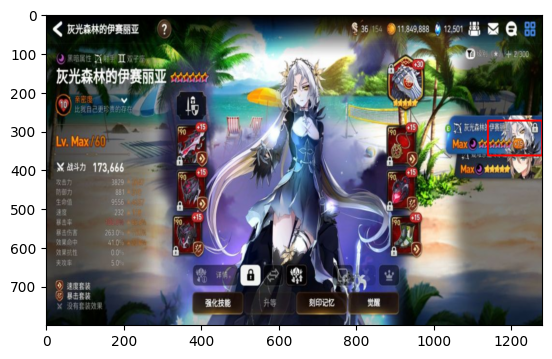

In [17]:
plt.imshow(img[:,:,::-1])

In [4]:
from tqdm import tqdm
img_folder = r"C:\Users\zhouy\source\repos\GameScriptLib\src\app\epic7\resources\photo"
output_folder = os.path.join(img_folder, "avatar")
for filename in tqdm(os.listdir(img_folder)):
    src_path = os.path.join(img_folder, filename)
    if os.path.isfile(src_path) and os.path.splitext(src_path)[1] in ['.jpg','.png']:
        get_avatar(src_path, output_folder,1)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 28.58it/s]


## second type is rta hero pick

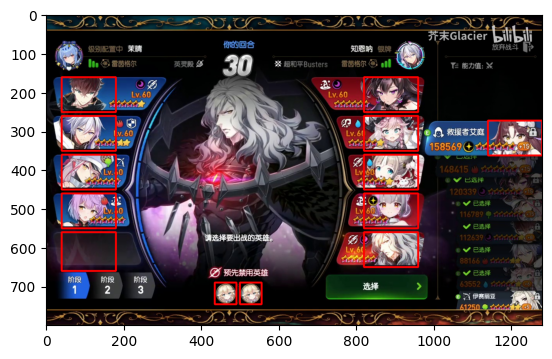

In [28]:
src_path = r"C:\Users\zhouy\source\repos\GameScriptLib\src\app\epic7\assert\photo\2\frame_2340.jpg"
img = cv2.imread(src_path)
for rect in rects["2"]:
    x1,y1,x2,y2 = rect
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 3)
plt.imshow(img[:,:,::-1])

In [29]:
from tqdm import tqdm
img_folder = r"C:\Users\zhouy\source\repos\GameScriptLib\src\app\epic7\assert\photo\2"
output_folder = os.path.join(img_folder, "avatar")
for filename in tqdm(os.listdir(img_folder)):
    src_path = os.path.join(img_folder, filename)
    if os.path.isfile(src_path) and src_path.endswith('.jpg'):
        get_avatar(src_path, output_folder,2)

100%|████████████████████████████████████████████████████████████████████████████████| 229/229 [00:05<00:00, 40.21it/s]


# get the equipment by rules

In [3]:
path = r"C:\Users\zhouy\Desktop\test\205.jpg"
img = cv2.imread(path)
img = cv2.resize(img, (1280,720))
cv2.imwrite( r"C:\Users\zhouy\Desktop\test\205_resize.jpg",img)

True

In [9]:
rect1 = [20,75,450,700]
rect2 = [835,75,990,700]
img1 = img[rect1[1]:rect1[3],rect1[0]:rect1[2]]
img2 = img[rect2[1]:rect2[3],rect2[0]:rect2[2]]
out_img = cv2.hconcat([img1,img2])

In [10]:
out_img.shape

(625, 585, 3)

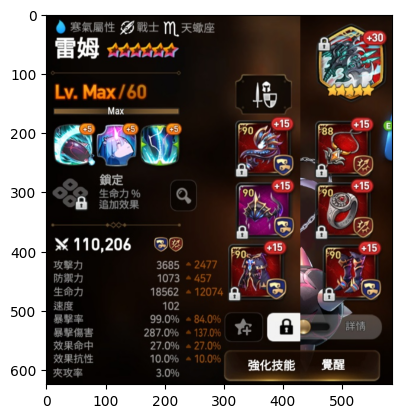

In [11]:
plt.imshow(out_img[:,:,::-1])